<a href="https://colab.research.google.com/github/Juan1mera/dap-2024/blob/main/les06/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №6. Линейная регрессия

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

## Извлечение данных
1. Выведете описание набора данных и наименование признаков.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

diabetes = datasets.load_diabetes()

# Вывод описания и названий признаков
print("Описание набора данных:")
print(diabetes.DESCR)
print("\nНазвания признаков:")
print(diabetes.feature_names)

Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

## Подготовка данных
2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [5]:
# Создание DataFrame
feature_names = diabetes.feature_names
df = pd.DataFrame(diabetes.data, columns=feature_names)
df['target'] = diabetes.target

# Вывод первых 5 строк
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


## Информация о типах данных
3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные, имеющие значение null?

In [6]:
# Общая информация о DataFrame
df.info()

# Проверка на категориальные признаки
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nКатегориальные признаки:", categorical_cols if categorical_cols else "Отсутствуют")

# Проверка на пропущенные значения
null_count = df.isnull().sum().sum()
print("Пропущенные значения (null):", null_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB

Категориальные признаки: Отсутствуют
Пропущенные значения (null): 0


## Исследование данных: матрица корреляции
4. Постройте матрицу корреляции.

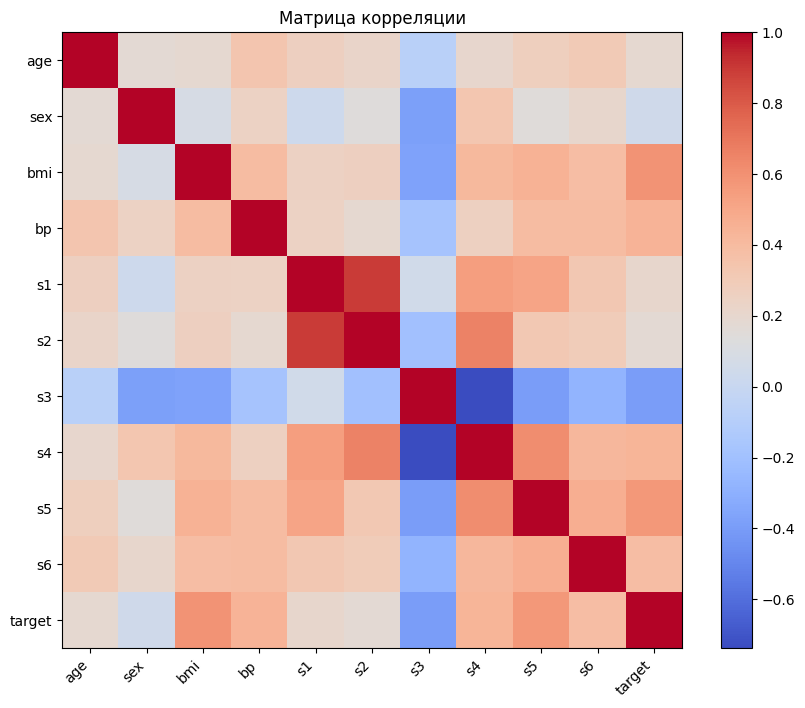

In [7]:
# Вычисление матрицы корреляции
corr_matrix = df.corr()

# Визуализация
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Матрица корреляции')
plt.show()

5. Постройте диаграмму рассеяния целевого значения и признака, коэффициент корреляции которого с целевым значением самый высокий.

Признак с наибольшей корреляцией с target: bmi (|r| = 0.586)


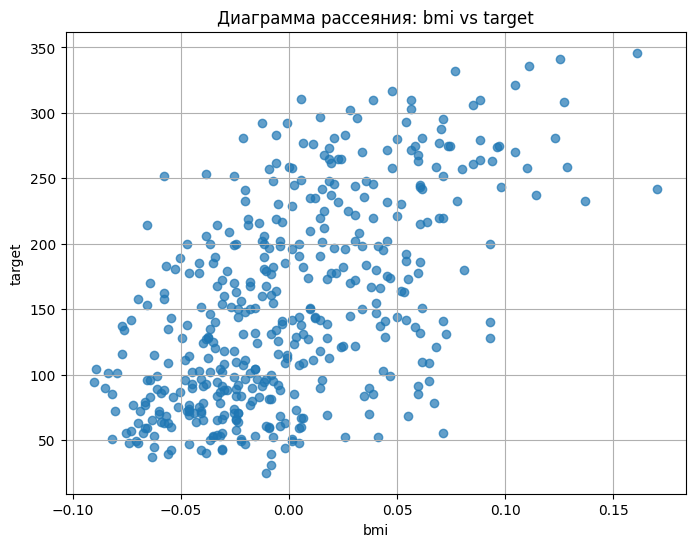

In [8]:
# Найдём признак с максимальной (по модулю) корреляцией с target
target_corr = corr_matrix['target'].drop('target').abs().sort_values(ascending=False)
best_feature = target_corr.index[0]
print(f"Признак с наибольшей корреляцией с target: {best_feature} (|r| = {target_corr.iloc[0]:.3f})")

# Диаграмма рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(df[best_feature], df['target'], alpha=0.7)
plt.xlabel(best_feature)
plt.ylabel('target')
plt.title(f'Диаграмма рассеяния: {best_feature} vs target')
plt.grid(True)
plt.show()

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [9]:
# Выбираем топ-5 признаков по корреляции с target
top_5_features = target_corr.head(5).index.tolist()
print("Выбранные признаки:", top_5_features)

X = df[top_5_features]
y = df['target']

Выбранные признаки: ['bmi', 's5', 'bp', 's4', 's3']


## Предсказательная модель
7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

print("Модель обучена.")

Модель обучена.


##Проверка модели
9. асчитайте Root mean squared error (RMSE)

In [12]:
from sklearn.metrics import mean_squared_error

# Предсказания
y_pred = model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 53.78


10. Рассчитайте R² (коэффициент детерминации).

In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R²): {r2:.4f}")

Коэффициент детерминации (R²): 0.4769


# Вопросы для защиты лабораторной работы №6

---

### Какие типы машинного обучения вы знаете?

Существует три основных типа:
1. **Обучение с учителем** — есть входы и правильные ответы (например, регрессия, классификация).
2. **Обучение без учителя** — только входы, нужно найти структуру (например, кластеризация).
3. **Обучение с подкреплением** — агент учится через взаимодействие со средой, получая награды/штрафы.

---

### Чем отличается обучение с учителем и без учителя?

- **С учителем**: данные размечены (известен `y`), цель — предсказать `y` по новым `X`.
- **Без учителя**: данные не размечены (`y` неизвестен), цель — найти скрытые паттерны (группы, зависимости).

---

### Чем пакетное обучение отличается от динамического?

- **Пакетное**: модель обучается на всём датасете сразу. Не обновляется до переобучения.
- **Динамическое (онлайн)**: модель обновляется по мере поступления новых данных (по одному или пачками).

---

### Чем обучение на основе образцов отличается от обучения на основе модели?

- **На основе образцов**: модель запоминает обучающие данные и предсказывает по сходству (например, kNN).
- **На основе модели**: модель строит обобщающую функцию (например, `y = w0 + w1*x1 + ...`) и предсказывает по ней (например, линейная регрессия).

---

### Что такое линейная регрессия?

Метод для предсказания **непрерывной** целевой переменной по признакам, предполагая **линейную зависимость**:

y = w0 + w1*x1 + w2*x2 + ... + wn*xn

Цель — подобрать веса `w`, чтобы предсказания были близки к реальным значениям.

---

### Что такое градиентный спуск?

Алгоритм для **минимизации функции потерь** (например, MSE). На каждой итерации обновляет веса против градиента:

w = w - alpha * градиент

где `alpha` — скорость обучения. Позволяет найти оптимальные параметры модели.

---

### Как правильно обрабатывать категориальные признаки?

Нужно преобразовать в числа:
- **One-Hot Encoding**: создаёт бинарные столбцы для каждой категории (лучше всего для номинальных признаков).
- **Label Encoding**: присваивает номера категориям (только если есть порядок!).
- Пример в pandas: `pd.get_dummies(df, columns=['cat_col'])`

---

### Что такое матрица корреляции?

Таблица, где каждая ячейка показывает **степень линейной связи** между двумя переменными:
- `1` — полная положительная связь,
- `-1` — полная отрицательная,
- `0` — нет линейной связи.

Помогает выявить сильные зависимости и мультиколлинеарность.

---

### Что показывает метрика RMSE?

**RMSE** — средняя ошибка предсказания в единицах целевой переменной:

RMSE = sqrt( mean( (y_true - y_pred)^2 ) )

Чем **меньше**, тем **лучше**. Чувствителен к большим ошибкам (выбросам).

---

### Что показывает метрика R²?

**R²** — доля дисперсии целевой переменной, объяснённая моделью:

R² = 1 - (SS_res / SS_tot)

- `R² = 1` — идеально,
- `R² = 0` — модель не лучше среднего,
- `R² < 0` — модель хуже среднего.

Интерпретируется как «процент объяснённой дисперсии».